## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import plotly.express as px



AttributeError: partially initialized module 'yaml' has no attribute 'error' (most likely due to a circular import)

In [4]:
# Load data
df = pd.read_csv("data.csv")
# Print shape of data to confirm data is loaded
df.head(n=5)


,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


# Data visualizations / Exploration

In [5]:
df.isna().sum()
# No missing values


type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
in_college               0
dtype: int64

In [ ]:

cor = df.corr()
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(cor, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cor[mask] = np.nan
(cor
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))


C:\Users\aledo\AppData\Local\Temp\ipykernel_11948\3815975901.py:6: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
parent_age,nan,nan,nan,nan,nan,nan
parent_salary,-0.29,nan,nan,nan,nan,nan
house_area,0.11,0.14,nan,nan,nan,nan
average_grades,-0.01,0.31,0.41,nan,nan,nan
parent_was_in_college,-0.44,0.11,0.15,0.24,nan,nan
in_college,0.04,0.48,0.47,0.51,0.05,nan


Text(0.5, 1.0, 'Residence of Students')

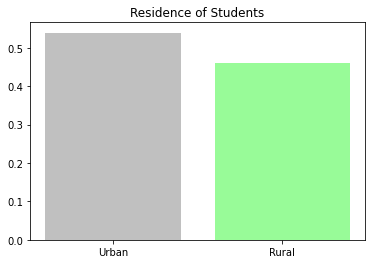

In [ ]:

SIZE = 1000
y = df.value_counts("residence")/SIZE
plt.pyplot.bar(x=list(y.index), height=y, color=["silver", "palegreen"])
plt.pyplot.title('Residence of Students')


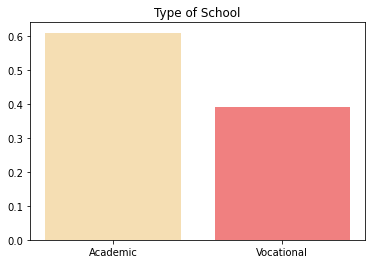

In [ ]:
y = df.value_counts("type_school")/SIZE
plt.pyplot.bar(x=list(y.index), height=y, color=["wheat", "lightcoral"])
plt.pyplot.title("Type of School")
plt.pyplot.show()


parent_was_in_college
True     0.52
False    0.48
dtype: float64

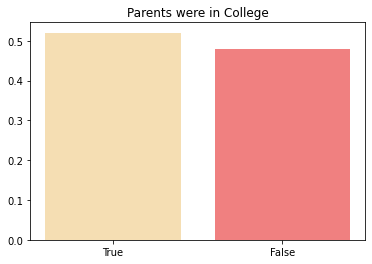

In [ ]:
y = df.value_counts("parent_was_in_college")/SIZE
plt.pyplot.bar(x=["True", "False"], height=y, color=["wheat", "lightcoral"])
plt.pyplot.title("Parents were in College")
# plt.pyplot.show()
y


In [ ]:
px.histogram(df, x="parent_age")


KeyboardInterrupt: 

In [ ]:
px.histogram(df, x="average_grades")


KeyboardInterrupt: 

In [ ]:
px.histogram(df, x="house_area")


: 

In [ ]:
px.histogram(df, x="parent_salary")


: 

In [ ]:
px.histogram(df, x="in_college")  # 50/50 split classes


: 

# Cleaning and preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score


loo = LeaveOneOut()


In [7]:
# Test train splitting with random seed 18 and 20/80 split
X = df.drop('in_college', axis=1)
y = df['in_college']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
# Test set is 200 obs
# Train set is 800 obs



In [8]:
# Transformers, ENCODER
cat_trans = make_column_transformer(
    (OneHotEncoder(), [0, 1, 2, 3, 4, 9]), remainder='passthrough')

X = cat_trans.fit_transform(X)
X_train = cat_trans.fit_transform(X_train)
X_test = cat_trans.transform(X_test)

# Transformers, SCALER
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Using SVD the training set accuracy is: 85.625
Using SVD the test set accuracy is: 86.5


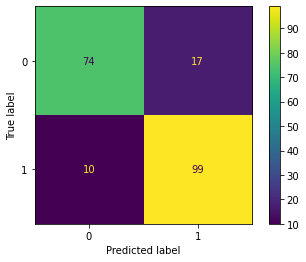

In [ ]:

# One run of LDA
# Create model
svd_LDA = LinearDiscriminantAnalysis(solver="svd")

svd_LDA.fit_transform(X_train, y_train)
predicted = svd_LDA.predict(X_train)
actual = np.array(y_train)
print("Using SVD the training set accuracy is:", accuracy_score(predicted, actual)*100)

predicted = svd_LDA.predict(X_test)
actual = np.array(y_test)
print("Using SVD the test set accuracy is:", accuracy_score(predicted, actual)*100)

ConfusionMatrixDisplay(confusion_matrix(y_test, predicted, labels=svd_LDA.classes_ )).plot()

In [ ]:

# Using ALL variables
allDA = 100*sum(cross_val_score(estimator=svd_LDA, X=X, y=y, cv=loo))/1000

In [9]:
# Dropping all categorical variables
cats = df.select_dtypes(include=['object']).columns.tolist()
cats.append('parent_was_in_college')
cats.append('in_college')

Xi = df.drop(cats, axis=1)
Xi = Xi.drop(['parent_age'],axis=1)

# Ordinal encoding
#lvls=['Not Interested','Less Interested', 'Uncertain', 'Quiet Interested', 'Very Interested']
#enc = OrdinalEncoder(categories=[lvls])
#enc.fit(df[['interest']])
#Xi['interest'] =  pd.DataFrame(enc.transform(df[['interest']]))[0]

# cat_trans = make_column_transformer((OneHotEncoder(), []), remainder='passthrough')
scaler = StandardScaler()

#Xi = cat_trans.fit_transform(Xi)
XI = scaler.fit_transform(df.drop(cats, axis=1))
Xi = scaler.fit_transform(Xi)

lda = LinearDiscriminantAnalysis(solver="eigen",shrinkage="auto")
acc4 = 100*sum(cross_val_score(estimator=lda, X=XI, y=y, cv=loo))/1000
acc3 = 100*sum(cross_val_score(estimator=lda, X=Xi, y=y, cv=loo))/1000

In [ ]:

print("The all inclusive (10) variable model had an accuracy of ", allDA, "percent using svd." )
print("The 4 variable model had an accuracy of ", acc4, "percent using eigen solver and Leidot-wolf shrinkage." )
print("The 3 variable model had an accuracy of ", acc3, "percent using eigen solver and Leidot-wolf shrinkage." )

The all inclusive (10) variable model had an accuracy of  86.2 percent using svd.
The 4 variable model had an accuracy of  81.3 percent using eigen solver and Leidot-wolf shrinkage.
The 3 variable model had an accuracy of  80.8 percent using eigen solver and Leidot-wolf shrinkage.


Linear Discriminant Analysis makes the assumption that the variables are all jointly distributed with Gaussian (normal) distributions. Therefore, when we utilize categorical features to attempt classification, they are not handled well. Them being made up of 0s and 1s fails this condition and contributes little to the model.

Because of this, the all inclusive 10 variable model report a 86.2% accuracy using LOOCV, whereas the solely numeric model, reports 81.1% accuracy with just 4 features. This tells us that the categorical variables as a whole only contributed 5.1% of the accuracy, and are not worth having unless prediction is of the utmost concern. 

More discussion here:
https://stats.stackexchange.com/questions/158772/can-we-use-categorical-independent-variable-in-discriminant-analysis

Using QDA the training set accuracy is: 55.25
Using QDA the test set accuracy is: 59.0


c:\Users\aledo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear



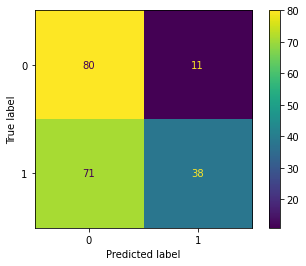

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# One run of LDA
# Create model
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)
predicted = qda.predict(X_train)
actual = np.array(y_train)
print("Using QDA the training set accuracy is:", accuracy_score(predicted, actual)*100)

predicted = qda.predict(X_test)
actual = np.array(y_test)
print("Using QDA the test set accuracy is:", accuracy_score(predicted, actual)*100)

ConfusionMatrixDisplay(confusion_matrix(y_test, predicted, labels=qda.classes_ )).plot()

In [ ]:

accAll=100*sum(cross_val_score(estimator=QuadraticDiscriminantAnalysis(), X=X, y=y, cv=loo))/1000

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear

c:\Users\aledo\anaconda3\lib\site-packag

In [ ]:
# Only run with numeric variables excluding parent_age
Xi = df.drop(cats, axis=1)



scaler = StandardScaler()

Xi = scaler.fit_transform(Xi.drop(['parent_age'], axis=1))
accNumeric = 100*sum(cross_val_score(estimator=QuadraticDiscriminantAnalysis(), X=Xi, y=y, cv=loo))/1000


In [ ]:
print("Using all variables the QDA model gives us", accAll, "percent accuracy.")
print("The 3 variable QDA model gives us", accNumeric, "percent accuracy.")
print("The 4 variable QDA model (with parent age) gives us 82.6 percent accuracy.")


Quadratic Discriminant Analysis relies on many of the same conditions as LDA, but suffers more strongly when they are violated. Hence the inclusion of categorical variables lowers accuracy substantially. When filtered to include only numeric data, the accuracy is slightly better than LDA (verified using LOOCV).

In [11]:
# Using Nearest Neighbors for classification
from sklearn.neighbors import KNeighborsClassifier
x=[]
# Using all variables, KNN peaks with K=9
for i in range(1, 15):
    nigh = KNeighborsClassifier(n_neighbors=i)
    nigh.fit(X_train, y_train)
    pr = nigh.predict(X_test)
    x.append((accuracy_score(y_test, pr), i))
print("KNN's best is", max(x))    

x=[]
# Using all variables, KNN peaks with K=9 with distance weights
for i in range(1, 15):
    nigh = KNeighborsClassifier(n_neighbors=i, weights="distance")
    nigh.fit(X_train, y_train)
    pr = nigh.predict(X_test)
    x.append((accuracy_score(y_test, pr), i))
print("KNN's best with inverse distance weights is", max(x))    

KNN's best is (0.875, 9)
KNN's best with inverse distance weights is (0.875, 13)


In [12]:
# Configure for RNN to use no categorical variables
X2 = df.drop(cats, axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=18)
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)


In [13]:
#LOOCV estimates using all variables
x=[]
acc=0
for i in range(1,15):

    acc=100*sum(cross_val_score(estimator=KNeighborsClassifier(n_neighbors=i, weights="uniform",p=1), X=X, y=y, cv=loo))/1000
    x.append((acc, i))
knnAverageMax =max(x)

x=[]
acc=0
for i in range(1,15):
    acc=100*sum(cross_val_score(estimator=KNeighborsClassifier(n_neighbors=i, weights="distance",p=1), X=X, y=y, cv=loo))/1000
    x.append((acc, i))
knnAverageMax_distance =max(x)

In [15]:
#LOOCV estimates using numeric variables
x=[]
acc=0
for i in range(1,15):

    acc=100*sum(cross_val_score(estimator=KNeighborsClassifier(n_neighbors=i, weights="uniform"), X=X2, y=y, cv=loo))/1000
    x.append((acc, i))
knnAverageMaxNum =max(x)

x=[]
acc=0
for i in range(1,15):

    acc=100*sum(cross_val_score(estimator=KNeighborsClassifier(n_neighbors=i, weights="distance"), X=X2, y=y, cv=loo))/1000
    x.append((acc, i))
knnAverageMaxNum_distance =max(x)

In [16]:
print("Using all variables, first with uniform then with inverse distance", knnAverageMax, knnAverageMax_distance)

print("Using only numeric variables, first with uniform then with inverse distance",  knnAverageMaxNum, knnAverageMaxNum_distance)

Using all variables, first with uniform then with inverse distance (85.9, 5) (86.6, 5)
Using only numeric variables, first with uniform then with inverse distance (71.4, 13) (67.7, 2)


A full 10 feature fitted KNN model using inverse distance metrics offered about 86.6% accuracy with the best K=9.
A 4 feature KNN model  using uniform distance metrics with only numerical features had an accuracy of 71.4% and K=13.

This is comparatively worse than LDA and QDA which both had accuracies of 81.3% and 82.6% using the same features.
When compared to the fully fit models, QDA does the worst with a 54.5%, LDA is in 2nd place with 86.2%, and KNN just barely beats them.

In [22]:
from sklearn import svm

# Simple run with all variables
svc = svm.LinearSVC()
svc.fit(X_train, y_train)
pr = svc.predict(X_test)
print(accuracy_score(y_test,pr))


svc = svm.SVC()
svc.fit(X_train, y_train)
pr = svc.predict(X_test)
print(accuracy_score(y_test,pr))

svc = svm.NuSVC()
svc.fit(X_train, y_train)
pr = svc.predict(X_test)
print(accuracy_score(y_test,pr))


0.855
0.9
0.9


In [ ]:


# Linear SVC with all variables
acc=100*sum(cross_val_score(estimator=svm.LinearSVC(), X=X, y=y, cv=loo))/1000
print("LOOCV estimate:", acc)
# 85.9% LOOCV average accuracy using all 10 variables


In [56]:
# Linear SVC
accNum=100*sum(cross_val_score(estimator=svm.LinearSVC(), X=X2, y=y, cv=loo))/1000
print("LOOCV estimate:", accNum)
# 49.5% LOOCV average accuracy using only 4 numeric variables

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\svm\_ba

LOOCV estimate: 49.5


c:\Users\aledo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\aledo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Linear SVC performed very well on the 10 